### Load Packages

In [1]:
# TODO: add annotations describing usage of different modules

from operator import mod
from os import getcwd
from os.path import exists, join

import joblib
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
import pandas as pd
import numpy as np
# from ydata_profiling import ProfileReport

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression, LinearRegression
import warnings
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import  GradientBoostingClassifier
# import xgboost as xgb
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score

from sklearn import tree
from sklearn.decomposition import PCA, SparsePCA

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import json
import pickle
from IPython.display import Image
import warnings

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

import altair as alt
import random
import warnings

warnings.filterwarnings('ignore')

# set seaborn whitegrid theme
sns.set(style="whitegrid")

from sklearn.inspection import permutation_importance

/Users/orencarmeli/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Load Data

In [2]:
cdc_survey = pd.read_csv('../data/cdc_nhanes_survey_responses_clean.csv')
print(cdc_survey.shape)

# filter to pregnant moms
cdc_survey_pmom = cdc_survey[cdc_survey['has_been_pregnant'] == 1]
print(cdc_survey_pmom.shape)

(35706, 863)
(7741, 863)


In [3]:
cdc_survey_pmom['weight_lbs_over_height_in_ratio'] = cdc_survey_pmom['weight_lbs'] / cdc_survey_pmom['height_in']
#cdc_survey_pmom['weight_lbs_over_height_in_ratio']

### Candidate Features

Here we list out all candidate features for our model. 

In [4]:
# Depression screener
dep_screener_cols = [
    'little_interest_in_doing_things',
    'feeling_down_depressed_hopeless',
    'trouble_falling_or_staying_asleep',
    'feeling_tired_or_having_little_energy',
    'poor_appetitie_or_overeating',
    'feeling_bad_about_yourself',
    'trouble_concentrating',
    'moving_or_speaking_to_slowly_or_fast',
    'thoughts_you_would_be_better_off_dead',
    'difficult_doing_daytoday_tasks'
]

# Alcohol & smoking
alcohol_n_smoking_cols = [
    'has_smoked_tabacco_last_5days',
    'alcoholic_drinks_past_12mo', 
    'drank_alc',
    'alc_drinking_freq',
    'alc_per_day',
    'times_with_4or5_alc',
    'times_with_8plus_alc',
    'times_with_12plus_alc',
    '4plus_alc_daily',
    'days_4plus_drinks_occasion',
    'smoked_100_cigs',
    'currently_smoke'
]

#Medical Conditions 
med_condition_cols = [
    'chest_discomfort',
    'asthma',
    'anemia_treatment',
    'blood_transfusion',
    'arthritis',
    'heart_failure',
    'coronary_heart_disease',
    'angina_pectoris',
    'heart_attack',
    'stroke',
    'thyroid_issues',
    'respiratory_issues',
    'abdominal_pain',
    'gallstones',
    'gallbladder_surgery',
    'cancer',
    'dr_recommend_lose_weight',
    'dr_recommend_exercise',
    'dr_recommend_reduce_salt',
    'dr_recommend_reduce_fat',
    'currently_losing_weight',
    'currently_increase_exercise',
    'currently_reducing_salt',
    'currently_reducing_fat',
    'metal_objects',
    'has_diabetes',    
    #Blood Pressure & Cholesterol 
    'high_bp',
    'age_hypertension',
    'hypertension_prescription',
    'high_bp_prescription',
    'high_cholesterol',
    'cholesterol_prescription',
    # general health
    'has_overweight_diagnosis',   
    'height_in',
    'weight_lbs', 
    'weight_lbs_over_height_in_ratio',
    'general_health_condition',      
]

# diet, nutrition, & exercise 
lifestyle_cols = [
    # exercise/weight loss
    'vigorous_work',
    'walk_or_bicycle',
    'vigorous_recreation',
    'moderate_recreation',    
    'count_days_moderate_recreational_activity',   
    'count_minutes_moderate_recreational_activity',
    'count_minutes_moderate_sedentary_activity',    
    'count_lost_10plus_pounds',
    'has_tried_to_lose_weight_12mo', 
    'attempt_weight_loss_1yr',           
    # diet
    'how_healthy_is_your_diet',    
    'milk_consumption_freq',
    'govmnt_meal_delivery',
    'nonhomemade_meals',
    'fastfood_meals',
    'readytoeat_meals',
    'frozen_pizza'   
]

# Reproductive Health 
reproductive_health_cols = [
    'regular_periods',
    'age_last_period',
    'try_pregnancy_1yr',
    'see_dr_fertility',
    'pelvic_infection',
    'pregnant_now',
    'pregnancy_count',
    'diabetes_pregnancy',
    'delivery_count',
    'live_birth_count',
    'age_at_first_birth',
    'age_at_last_birth',
    'months_since_birth',
    'horomones_not_bc'
]

# hospital usage & access to care
hospital_utilization_n_access_cols = [
    'general_health',
    'regular_healthcare_place',
    'time_since_last_healthcare',
    'overnight_in_hospital',
    'seen_mental_health_professional',
    'count_days_seen_doctor_12mo',
    'duration_last_healthcare_visit',   
]

# socioeconomic status
socioeconomic_cols = [
    #Food Security
    'emergency_food_received',
    'food_stamps_used',      
    #Health Insurance
    'have_health_insurance',
    'have_private_insurance',
    'plan_cover_prescriptions',   
    #Income
    'family_poverty_level',
    'family_poverty_level_category',
    #Occupation
    'hours_worked',
    'over_35_hrs_worked',
    'work_schedule'    
]

demographic_cols = [
    'food_security_level_household',   
    'food_security_level_adult',    
    'monthly_poverty_index_category',
    'monthly_poverty_index',
    'count_hours_worked_last_week',
    'age_in_years',   
    'education_level',
    'is_usa_born',    
    'has_health_insurance',
    'has_health_insurance_gap'   
]

# combine all candidate features
candidate_features = dep_screener_cols + \
    alcohol_n_smoking_cols + \
    med_condition_cols + \
    hospital_utilization_n_access_cols + \
    lifestyle_cols + \
    socioeconomic_cols + \
    reproductive_health_cols + \
    demographic_cols


len(candidate_features)

117

# EDA

### # of nulls by columns

In [5]:
pd.set_option('display.max_rows', 1000)
#pd.reset_option('^display.', silent=True)

In [6]:
null_value_tot = pd.DataFrame(
    cdc_survey_pmom[candidate_features].isna().sum())\
    .rename(columns={0:'num_nulls'}
).reset_index()
null_value_tot = null_value_tot.sort_values(by = 'num_nulls',ascending=False)
null_value_tot['pct_null'] = null_value_tot['num_nulls'] / cdc_survey_pmom.shape[0]
null_value_tot.rename(columns={'index':'feature'},inplace=True)
null_value_tot

,feature,num_nulls,pct_null
17,times_with_12plus_alc,7582,0.979460
61,time_since_last_healthcare,7406,0.956724
65,duration_last_healthcare_visit,7406,0.956724
105,months_since_birth,7180,0.927529
16,times_with_8plus_alc,6973,0.900788
64,count_days_seen_doctor_12mo,6858,0.885932
91,over_35_hrs_worked,6491,0.838522
86,have_private_insurance,6077,0.785041
92,work_schedule,6025,0.778323
71,count_minutes_moderate_recreational_activity,5664,0.731688


In [7]:
null_value_tot[null_value_tot['pct_null'] > 0.5].shape

(38, 3)

In [8]:
null_value_tot[null_value_tot['feature'] == "weight_lbs_over_height_in_ratio"]

,feature,num_nulls,pct_null
57,weight_lbs_over_height_in_ratio,302,0.039013


<Axes: xlabel='pct_null', ylabel='Count'>

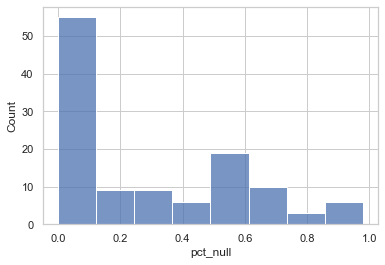

In [9]:
sns.histplot(null_value_tot['pct_null'])

## EDA on features

better understand features & how target looks across ones

In [10]:
def univariate_analysis(
    df_to_use = cdc_survey_pmom,
    columns = dep_screener_cols,
    target_col = 'MDD'):
    
    column_values = pd.DataFrame(columns = ['col_value','pct_target','num_responses','feature'])
    column_summary = pd.DataFrame(columns=['feature','corr','corr_abs','std','min','max','unique_values','target','max_minus_min'])

    # MDD coverage by feature
    for col in columns:

        # calc mean pct for target column by indicator variable
        univariate = df_to_use.groupby(col) \
               .agg({target_col:'mean', 'SEQN':'count'}) \
               .reset_index() \
               .rename(columns={col:'col_value',target_col:'pct_target','SEQN':'num_responses'})

        print(f"\n{col}\n")
        print(univariate)
        
        # aggregate into summary table
        column_traits = pd.DataFrame({
            'feature':[col],
            'corr':[cdc_survey_pmom[['MDD',col]].corr().iloc[1,0]],
            'corr_abs':[abs(cdc_survey_pmom[['MDD',col]].corr().iloc[1,0])],            
            'std':[univariate[univariate['num_responses'] >= 30]['pct_target'].std()],
            'min':[univariate[univariate['num_responses'] >= 30]['pct_target'].min()],
            'max':[univariate[univariate['num_responses'] >= 30]['pct_target'].max()],
            'unique_values':[univariate[univariate['num_responses'] >= 30].shape[0]],
            'target':[target_col]
        })
        column_traits['max_minus_min'] = column_traits['max'] - column_traits['min']
        column_summary = pd.concat([column_summary,column_traits])
        
        # univariate data
        univariate['feature'] = col
        column_values = pd.concat([column_values,univariate])
        
    return column_summary, column_values
        
univariate_stats, univariate_values = univariate_analysis(columns=candidate_features)


little_interest_in_doing_things

   col_value  pct_target  num_responses
0        0.0    0.059163           5375
1        1.0    0.166320           1443
2        2.0    0.179601            451
3        3.0    0.258706            402

feeling_down_depressed_hopeless

   col_value  pct_target  num_responses
0        0.0    0.050074           5432
1        1.0    0.175738           1525
2        2.0    0.225316            395
3        3.0    0.351097            319

trouble_falling_or_staying_asleep

   col_value  pct_target  num_responses
0        0.0    0.059644           4376
1        1.0    0.108974           1872
2        2.0    0.170103            582
3        3.0    0.210651            845

feeling_tired_or_having_little_energy

   col_value  pct_target  num_responses
0        0.0    0.041215           3227
1        1.0    0.095186           2763
2        2.0    0.146310            786
3        3.0    0.257492            901

poor_appetitie_or_overeating

   col_value  pct_target 


dr_recommend_reduce_salt

   col_value  pct_target  num_responses
0        1.0    0.121622           1110
1        2.0    0.092730           2297

dr_recommend_reduce_fat

   col_value  pct_target  num_responses
0        1.0    0.130469           1257
1        2.0    0.085462           2153

currently_losing_weight

   col_value  pct_target  num_responses
0        1.0    0.107127           2259
1        2.0    0.092014           1152

currently_increase_exercise

   col_value  pct_target  num_responses
0        1.0    0.094716           2006
1        2.0    0.112376           1406

currently_reducing_salt

   col_value  pct_target  num_responses
0        1.0    0.103934           2059
1        2.0    0.099039           1353

currently_reducing_fat

   col_value  pct_target  num_responses
0        1.0    0.105239           2214
1        2.0    0.096234           1195

metal_objects

   col_value  pct_target  num_responses
0        1.0    0.150635           1102
1        2.0    0.101695


fastfood_meals

    col_value  pct_target  num_responses
0         0.0    0.096865           1786
1         1.0    0.098534           1705
2         2.0    0.094512            984
3         3.0    0.093805            565
4         4.0    0.093496            246
5         5.0    0.078049            205
6         6.0    0.114754             61
7         7.0    0.112069            116
8         8.0    0.125000             24
9         9.0    0.000000              7
10       10.0    0.139535             43
11       11.0    0.000000              3
12       12.0    0.166667              6
13       13.0    0.000000              4
14       14.0    0.230769             26
15       15.0    0.000000             12
16       16.0    0.000000              2
17       17.0    0.000000              1
18       18.0    0.000000              3
19       20.0    0.000000              2
20       21.0    0.000000             10

readytoeat_meals

    col_value  pct_target  num_responses
0         0.0    0.09

<Axes: xlabel='corr', ylabel='Count'>

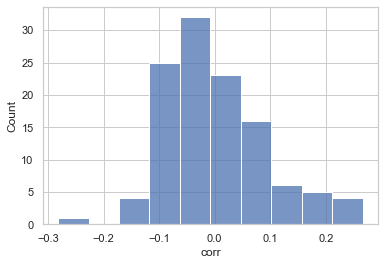

In [13]:
sns.histplot(univariate_stats['corr'])

<Axes: xlabel='max_minus_min', ylabel='Count'>

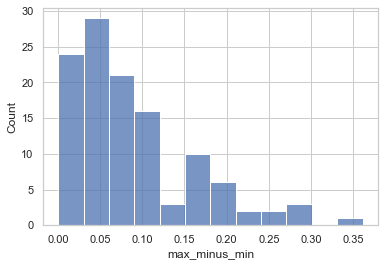

In [14]:
sns.histplot(univariate_stats['max_minus_min'])

In [15]:
univariate_summary = univariate_stats.merge(null_value_tot, left_on='feature', right_on='feature', how = 'left')
univariate_summary.sort_values(by = 'std', ascending=False)

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
63,seen_mental_health_professional,-0.281615,0.281615,0.197384,0.069421,0.348564,2,MDD,0.279143,3,0.000388
9,difficult_doing_daytoday_tasks,0.251297,0.251297,0.153630,0.074218,0.435644,4,MDD,0.361426,2106,0.272058
1,feeling_down_depressed_hopeless,0.266087,0.266087,0.124548,0.050074,0.351097,4,MDD,0.301024,70,0.009043
8,thoughts_you_would_be_better_off_dead,0.123574,0.123574,0.115184,0.088590,0.355556,4,MDD,0.266965,67,0.008655
5,feeling_bad_about_yourself,0.220417,0.220417,0.106486,0.065326,0.324324,4,MDD,0.258998,68,0.008784
6,trouble_concentrating,0.203917,0.203917,0.093549,0.067895,0.287926,4,MDD,0.220030,63,0.008138
3,feeling_tired_or_having_little_energy,0.225408,0.225408,0.092219,0.041215,0.257492,4,MDD,0.216277,64,0.008268
4,poor_appetitie_or_overeating,0.184182,0.184182,0.082427,0.064676,0.263048,4,MDD,0.198372,64,0.008268
0,little_interest_in_doing_things,0.197702,0.197702,0.082044,0.059163,0.258706,4,MDD,0.199544,70,0.009043
28,coronary_heart_disease,-0.067706,0.067706,0.081501,0.093073,0.208333,2,MDD,0.115260,23,0.002971


In [16]:
univariate_summary.sort_values(by = 'corr_abs', ascending=False)

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
63,seen_mental_health_professional,-0.281615,0.281615,0.197384,0.069421,0.348564,2,MDD,0.279143,3,0.000388
1,feeling_down_depressed_hopeless,0.266087,0.266087,0.124548,0.050074,0.351097,4,MDD,0.301024,70,0.009043
9,difficult_doing_daytoday_tasks,0.251297,0.251297,0.153630,0.074218,0.435644,4,MDD,0.361426,2106,0.272058
3,feeling_tired_or_having_little_energy,0.225408,0.225408,0.092219,0.041215,0.257492,4,MDD,0.216277,64,0.008268
5,feeling_bad_about_yourself,0.220417,0.220417,0.106486,0.065326,0.324324,4,MDD,0.258998,68,0.008784
6,trouble_concentrating,0.203917,0.203917,0.093549,0.067895,0.287926,4,MDD,0.220030,63,0.008138
0,little_interest_in_doing_things,0.197702,0.197702,0.082044,0.059163,0.258706,4,MDD,0.199544,70,0.009043
4,poor_appetitie_or_overeating,0.184182,0.184182,0.082427,0.064676,0.263048,4,MDD,0.198372,64,0.008268
2,trouble_falling_or_staying_asleep,0.174241,0.174241,0.066556,0.059644,0.210651,4,MDD,0.151007,66,0.008526
64,count_days_seen_doctor_12mo,0.171175,0.171175,0.065676,0.098901,0.276596,6,MDD,0.177695,6858,0.885932


In [28]:
# Variables that are candidates for binning

univariate_summary[univariate_summary['unique_values'] >= 10].sort_values(by = 'corr_abs', ascending=False)

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null,feature_theme
57,weight_lbs_over_height_in_ratio,0.094843,0.094843,0.057538,0.000000,0.193548,25,MDD,0.193548,302,0.039013,med_condition
56,weight_lbs,0.094245,0.094245,0.044231,0.015385,0.205882,76,MDD,0.190498,146,0.018861,med_condition
112,age_in_years,0.080434,0.080434,0.039757,0.000000,0.153226,61,MDD,0.153226,0,0.000000,demographic
82,frozen_pizza,0.079178,0.079178,0.048493,0.077392,0.254237,14,MDD,0.176845,8,0.001033,lifestyle
72,count_minutes_moderate_sedentary_activity,0.078043,0.078043,0.031585,0.066667,0.162162,15,MDD,0.095495,2254,0.291177,lifestyle
94,age_last_period,-0.075339,0.075339,0.042162,0.069444,0.240000,34,MDD,0.170556,3276,0.423201,reproductive_health
103,age_at_first_birth,-0.046757,0.046757,0.024475,0.039216,0.121951,23,MDD,0.082736,2157,0.278646,reproductive_health
49,age_hypertension,-0.043941,0.043941,0.059984,0.032258,0.309524,40,MDD,0.277266,4598,0.593980,med_condition
90,hours_worked,-0.035564,0.035564,0.035912,0.023256,0.173913,24,MDD,0.150657,4078,0.526805,socioeconomic
111,count_hours_worked_last_week,-0.035345,0.035345,0.035912,0.023256,0.173913,24,MDD,0.150657,4079,0.526935,demographic


In [ ]:
#univariate_summary[univariate_summary['feature'] == 'weight_lbs_over_height_in_ratio']

In [ ]:
#univariate_values[univariate_values['feature'] == 'weight_lbs_over_height_in_ratio']

## Look at stats by theme

In [19]:
def create_theme_col(value):
    if value in dep_screener_cols:
        return 'dep_screener'
    elif value in alcohol_n_smoking_cols:
        return 'alcohol_n_smoking'
    elif value in med_condition_cols:
        return 'med_condition'
    elif value in lifestyle_cols:
        return 'lifestyle'
    elif value in socioeconomic_cols:
        return 'socioeconomic'
    elif value in reproductive_health_cols:
        return 'reproductive_health'
    elif value in demographic_cols:
        return 'demographic'    
    
univariate_summary['feature_theme'] = univariate_summary['feature'].map(create_theme_col)    

In [20]:
univariate_summary.groupby(['feature_theme']).agg('count')

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null
feature_theme,,,,,,,,,,,
alcohol_n_smoking,12,12,12,11,12,12,12,12,12,12,12
demographic,10,10,10,10,10,10,10,10,10,10,10
dep_screener,10,10,10,10,10,10,10,10,10,10,10
lifestyle,17,17,17,17,17,17,17,17,17,17,17
med_condition,37,37,37,37,37,37,37,37,37,37,37
reproductive_health,14,14,14,14,14,14,14,14,14,14,14
socioeconomic,10,9,9,9,10,10,10,10,10,10,10


In [21]:
stat_cols = ['corr_abs','min','max','max_minus_min','pct_null']

In [22]:
stat_cols = ['corr_abs','min','max','max_minus_min','pct_null']

def create_summary(aggregation_method = 'mean'):

    summary_by_theme = univariate_summary.groupby(['feature_theme'])[stat_cols] \
        .agg(aggregation_method) \
        .reset_index() 

    summary_by_theme['num_features'] = list(univariate_summary.groupby(['feature_theme'])['feature'].count())
    return summary_by_theme.sort_values(by = 'corr_abs', ascending=False)

create_summary(aggregation_method = 'mean')

,feature_theme,corr_abs,min,max,max_minus_min,pct_null,num_features
2,dep_screener,0.199110,0.065171,0.302117,0.236946,0.034918,10
4,med_condition,0.069241,0.081455,0.157108,0.075653,0.258431,37
0,alcohol_n_smoking,0.054075,0.076371,0.150898,0.074528,0.526461,12
1,demographic,0.053226,0.062404,0.133207,0.070803,0.100026,10
6,socioeconomic,0.047924,0.069926,0.115137,0.045211,0.341222,10
3,lifestyle,0.043028,0.071992,0.145151,0.073159,0.272263,17
5,reproductive_health,0.038071,0.061459,0.120253,0.058794,0.306097,14


In [23]:
create_summary(aggregation_method = 'mean')

,feature_theme,corr_abs,min,max,max_minus_min,pct_null,num_features
2,dep_screener,0.199110,0.065171,0.302117,0.236946,0.034918,10
4,med_condition,0.069241,0.081455,0.157108,0.075653,0.258431,37
0,alcohol_n_smoking,0.054075,0.076371,0.150898,0.074528,0.526461,12
1,demographic,0.053226,0.062404,0.133207,0.070803,0.100026,10
6,socioeconomic,0.047924,0.069926,0.115137,0.045211,0.341222,10
3,lifestyle,0.043028,0.071992,0.145151,0.073159,0.272263,17
5,reproductive_health,0.038071,0.061459,0.120253,0.058794,0.306097,14


In [24]:
create_summary(aggregation_method = 'median')

,feature_theme,corr_abs,min,max,max_minus_min,pct_null,num_features
2,dep_screener,0.200810,0.065001,0.282328,0.218154,0.008591,10
4,med_condition,0.068000,0.088121,0.145414,0.061160,0.039013,37
1,demographic,0.056889,0.074892,0.116865,0.067127,0.035913,10
6,socioeconomic,0.035564,0.076822,0.107537,0.037433,0.161219,10
5,reproductive_health,0.032181,0.066374,0.120500,0.045460,0.326960,14
0,alcohol_n_smoking,0.029993,0.070599,0.148729,0.065621,0.616587,12
3,lifestyle,0.024879,0.077392,0.117647,0.064798,0.283684,17


In [25]:
create_summary(aggregation_method = 'max')

,feature_theme,corr_abs,min,max,max_minus_min,pct_null,num_features
2,dep_screener,0.266087,0.088590,0.435644,0.361426,0.272058,10
0,alcohol_n_smoking,0.164896,0.150000,0.191126,0.145455,0.979460,12
4,med_condition,0.162268,0.125000,0.309524,0.277266,0.618396,37
3,lifestyle,0.112602,0.111031,0.254237,0.196429,0.731688,17
1,demographic,0.108059,0.104563,0.175074,0.153226,0.526935,10
5,reproductive_health,0.105222,0.085106,0.240000,0.170556,0.927529,14
6,socioeconomic,0.091506,0.099150,0.173913,0.150657,0.838522,10


<Axes: xlabel='corr_abs', ylabel='max_minus_min'>

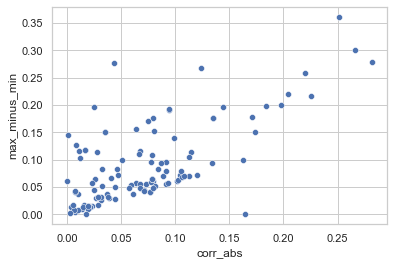

In [26]:
univariate_summary

sns.scatterplot(data=univariate_summary, x='corr_abs', y='max_minus_min')

In [30]:
univariate_summary[univariate_summary['feature_theme'] == "med_condition"]

,feature,corr,corr_abs,std,min,max,unique_values,target,max_minus_min,num_nulls,pct_null,feature_theme
22,chest_discomfort,-0.134263,0.134263,0.066257,0.085303,0.179005,2,MDD,0.093701,1990,0.257073,med_condition
23,asthma,-0.073176,0.073176,0.039782,0.087005,0.143264,2,MDD,0.056260,5,0.000646,med_condition
24,anemia_treatment,-0.026601,0.026601,0.020976,0.094485,0.124150,2,MDD,0.029665,9,0.001163,med_condition
25,blood_transfusion,-0.067643,0.067643,0.038872,0.088121,0.143095,2,MDD,0.054973,82,0.010593,med_condition
26,arthritis,-0.162268,0.162268,0.070871,0.061262,0.161488,2,MDD,0.100227,27,0.003488,med_condition
27,heart_failure,-0.041013,0.041013,0.046977,0.094613,0.161049,2,MDD,0.066436,12,0.001550,med_condition
28,coronary_heart_disease,-0.067706,0.067706,0.081501,0.093073,0.208333,2,MDD,0.115260,23,0.002971,med_condition
29,angina_pectoris,-0.051130,0.051130,0.069829,0.094796,0.193548,2,MDD,0.098753,23,0.002971,med_condition
30,heart_attack,-0.066955,0.066955,0.078657,0.093487,0.204724,2,MDD,0.111238,10,0.001292,med_condition
31,stroke,-0.078595,0.078595,0.077253,0.091835,0.201087,2,MDD,0.109252,12,0.001550,med_condition
